# Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [3]:
ubike_data=pd.read_csv("C:\\Users\\ksila\\Downloads\\Masters\\INFO 523 Course 2 - Data Mining and Discovery\\EDA Assignement\\Uber Request Data.csv")

## Data Cleaning
### Identifying missing values, anomalies/outliers, incorrect format and inconsistent spellings

In [4]:
# Check the data loaded in dataframe
ubike_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
# Varifying the object type
ubike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
# Checking the dimension of dataframe
ubike_data.shape

(6745, 6)

In [7]:
# Check for null values
ubike_data.isnull().sum(axis=0)

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
# Check for #N/A values
ubike_data.isna().sum(axis =0)

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [9]:
# Check for duplicate values
ubike_data.duplicated().sum(axis=0)

0

In [10]:
# Converting "Request timestamp" to datetime object
ubike_data["Request timestamp"] = ubike_data["Request timestamp"].astype(str)
ubike_data['Request timestamp'] = ubike_data['Request timestamp'].str.replace("/", "-")
ubike_data['Request timestamp'] = pd.to_datetime(ubike_data["Request timestamp"], dayfirst=True)

In [11]:
# Converting "Drop timestamp" to datetime object
ubike_data["Drop timestamp"] = ubike_data["Drop timestamp"].astype(str)
ubike_data['Drop timestamp'] = ubike_data['Drop timestamp'].str.replace("/", "-")
ubike_data['Drop timestamp'] = pd.to_datetime(ubike_data["Drop timestamp"], dayfirst=True)

In [12]:
# Verifying the object type post covertion
ubike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [13]:
# Extract the hour from the request timestamp
request_hour = ubike_data["Request timestamp"].dt.hour
ubike_data["Request_hour"] = request_hour

In [14]:
request_hour.value_counts().sort_values(ascending=False)

18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: Request timestamp, dtype: int64

In [15]:
# Extract the day from the request time
req_day = ubike_data["Request timestamp"].dt.day
ubike_data["Request_day"] = req_day

In [16]:
req_day.value_counts()

15    1381
11    1367
14    1353
13    1337
12    1307
Name: Request timestamp, dtype: int64

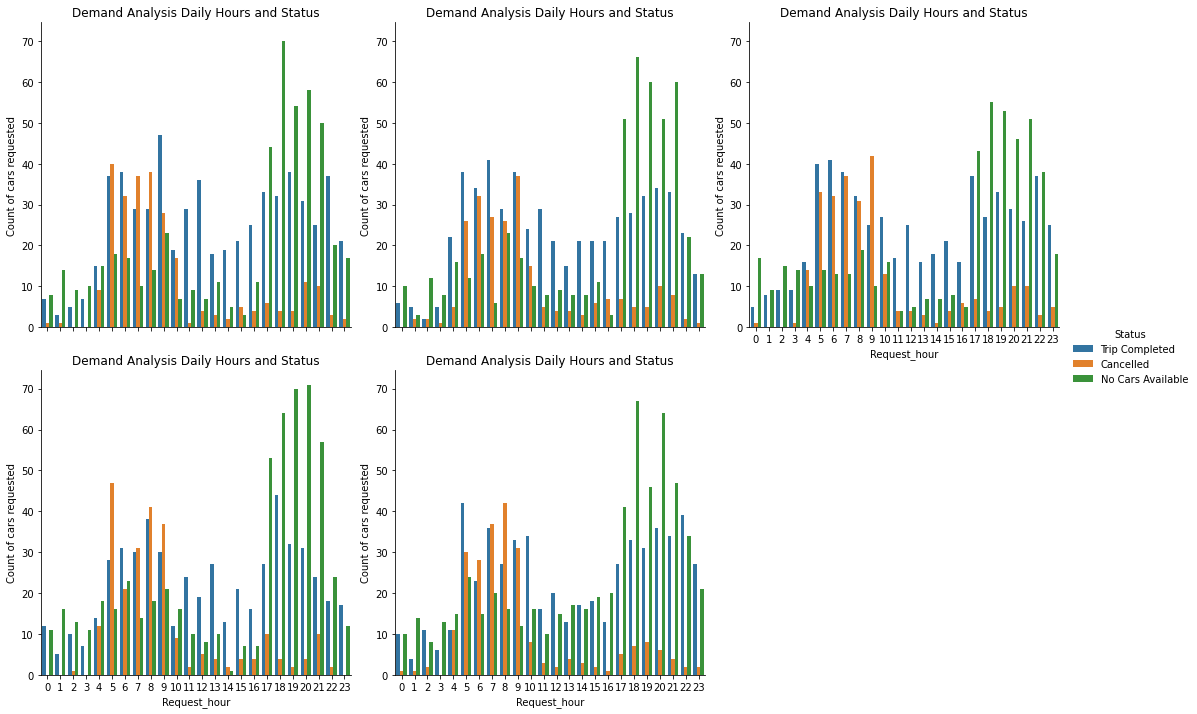

In [17]:
# Factor plot of hour and day versus status
status_dayhr=sns.factorplot(x = "Request_hour", hue = "Status", col = "Request_day",col_wrap =3, data = ubike_data, sharey="False", kind = "count")
status_dayhr.set(title="Demand Analysis Daily Hours and Status", ylabel= "Count of cars requested")
plt.show()

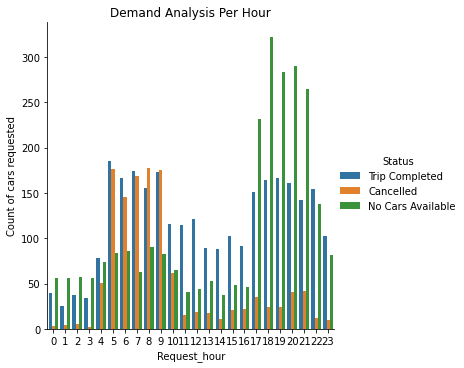

In [18]:
# Factor plot of hour versus status
status_hour=sns.factorplot(x = "Request_hour", hue = "Status",data = ubike_data, kind = "count")
status_hour.set(title="Demand Analysis Per Hour", ylabel= "Count of cars requested")
#status_hour.set(ylabel="car")
plt.show()

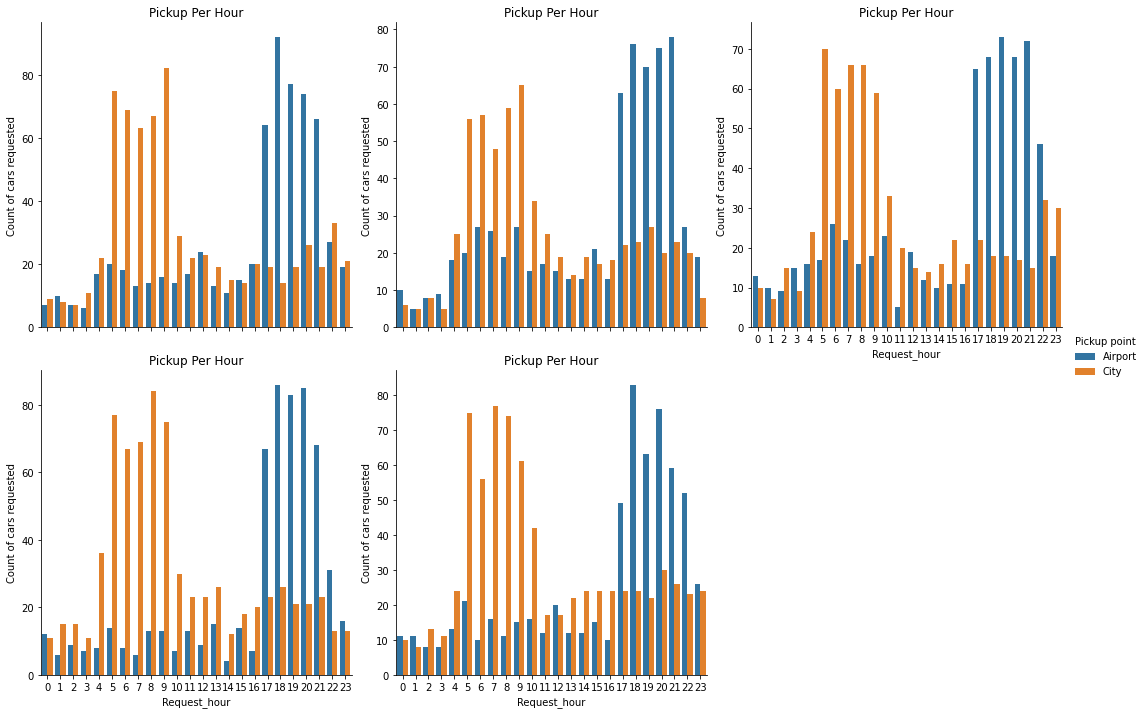

In [19]:
# Factor plot of hour and day versus Pickup Point
pickup_hr=sns.factorplot(x = "Request_hour", hue = "Pickup point", col = "Request_day",col_wrap =3,sharey=False, data = ubike_data, kind = "count")
pickup_hr.set(title="Pickup Per Hour", ylabel= "Count of cars requested")
plt.show()

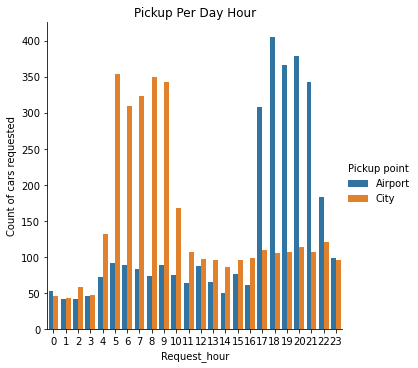

In [20]:
# Factor plot of hour and day versus Pickup Point
pickup_day=sns.factorplot(x = "Request_hour", hue = "Pickup point", data = ubike_data, kind = "count")
pickup_day.set(title="Pickup Per Day Hour", ylabel= "Count of cars requested")
plt.show()

In [21]:
# Categorizing time of day based on the above charts
def time_period(x):
    if x < 5:
        return "Early_Morning"
    elif 5 <= x < 10:
        return "Morning_Peakhours"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening_Peakhours"
    else:
        return "Late_Evenings"

ubike_data['Time_of_Day'] = ubike_data.Request_hour.apply(lambda x: time_period(x))

In [22]:
ubike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
 6   Request_hour       6745 non-null   int64         
 7   Request_day        6745 non-null   int64         
 8   Time_of_Day        6745 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 474.4+ KB


In [23]:
ubike_data.Time_of_Day.value_counts()

Evening_Peakhours    2342
Morning_Peakhours    2103
Day_Time             1224
Early_Morning         578
Late_Evenings         498
Name: Time_of_Day, dtype: int64

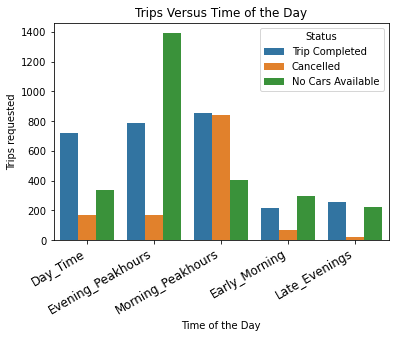

In [24]:
# plot time slot w.r.t. status and identify the most critical problems before Uber
sns.countplot(x = "Time_of_Day", hue = "Status", data = ubike_data).set(title="Trips Versus Time of the Day", xlabel="Time of the Day", ylabel= "Trips requested")
plt.xticks(
    rotation=30, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

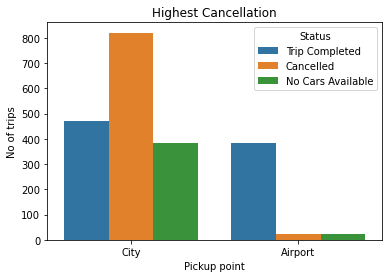

In [25]:
# We can see in the above plot the higest cancellations are in the "Morning Peakhours" time of the Day
ubike_data_Morning_Peakhours = ubike_data[ubike_data.Time_of_Day == "Morning_Peakhours"]
sns.countplot(x = "Pickup point", hue = "Status", data = ubike_data_Morning_Peakhours).set(title="Highest Cancellation",ylabel="No of trips")
plt.show()

In [26]:
# Severity of problem by location and their count
# Cancelled trips from Airport
airport_cancelled  = ubike_data_Morning_Peakhours.loc[(ubike_data_Morning_Peakhours["Pickup point"] == "Airport") & (ubike_data_Morning_Peakhours["Status"] == "Cancelled")]
len(airport_cancelled.index)

23

In [27]:
# Cancelled trips from City
city_cancelled = ubike_data_Morning_Peakhours.loc[(ubike_data_Morning_Peakhours["Pickup point"] == "City") & (ubike_data_Morning_Peakhours["Status"] == "Cancelled")]
len(city_cancelled.index)

820

In [28]:
# Supply and demand in morning peakhours in the city
city_completed_morning_peakhours = ubike_data_Morning_Peakhours.loc[(ubike_data_Morning_Peakhours["Pickup point"] == "City") & (ubike_data_Morning_Peakhours["Status"] == "Trip Completed")]
len(city_completed_morning_peakhours.index)

472

In [29]:
city_morning_peakhours  = ubike_data_Morning_Peakhours.loc[(ubike_data_Morning_Peakhours["Pickup point"] == "City")]
len(city_morning_peakhours.index)

1677

In [30]:
# Ssupply and demand in morning peakhour at the airport
airport_completed_morning_peakhours = ubike_data_Morning_Peakhours.loc[(ubike_data_Morning_Peakhours["Pickup point"] == "Airport") & (ubike_data_Morning_Peakhours["Status"] == "Trip Completed")]
len(airport_completed_morning_peakhours.index)

382

In [31]:
airport_morning_peakhours  = ubike_data_Morning_Peakhours.loc[(ubike_data_Morning_Peakhours["Pickup point"] == "Airport")]
len(airport_morning_peakhours.index)

426

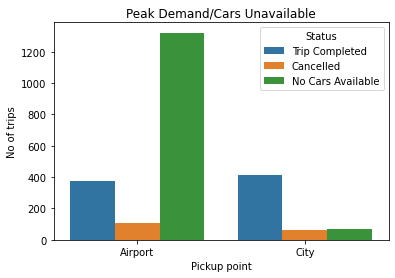

In [32]:
# We can see in the plot the mostly cars are unavailable in the "Evening Peakhours" time of the Day
ubike_data_Evening_Peakhours = ubike_data[ubike_data.Time_of_Day == "Evening_Peakhours"]
sns.countplot(x = "Pickup point", hue = "Status", data = ubike_data_Evening_Peakhours).set(title="Peak Demand/Cars Unavailable",ylabel="No of trips")
plt.show()

In [33]:
# let's look at the supply and demand in evening peakhours hour in the city
# City completed trips(supplied)
city_completed_evening_peakhours = ubike_data_Evening_Peakhours.loc[(ubike_data_Evening_Peakhours["Pickup point"] == "City") & (ubike_data_Evening_Peakhours["Status"] == "Trip Completed")]
len(city_completed_evening_peakhours.index)

411

In [34]:
# City Demand
city_evening_peakhours  = ubike_data_Evening_Peakhours.loc[(ubike_data_Evening_Peakhours["Pickup point"] == "City")]
len(city_evening_peakhours.index)

542

In [35]:
# let's look at the supply and demand in evening peakhours hour from the airport
# Airport completed trips (Supplied)
airport_completed_evening_peakhours = ubike_data_Evening_Peakhours.loc[(ubike_data_Evening_Peakhours["Pickup point"] == "Airport") & (ubike_data_Evening_Peakhours["Status"] == "Trip Completed")]
len(airport_completed_evening_peakhours.index)

373

In [36]:
#Airport Demand
airport_evening_peakhours  = ubike_data_Evening_Peakhours.loc[(ubike_data_Evening_Peakhours["Pickup point"] == "Airport")]
len(airport_evening_peakhours.index)

1800

In [37]:
# let's look at the severity problem (of demand and supply) at each location by looking at cancellation of cab in each of the pickup location in evening peakhours
#Airport cancelled_evening
airport_cancelled_evening_peakhours  = ubike_data_Evening_Peakhours.loc[(ubike_data_Evening_Peakhours["Pickup point"] == "Airport") & (ubike_data_Evening_Peakhours["Status"] == "Cancelled")]
len(airport_cancelled_evening_peakhours.index)

106

In [38]:
#City cancelled_evening
city_cancelled_evening_peakhours = ubike_data_Evening_Peakhours.loc[(ubike_data_Evening_Peakhours["Pickup point"] == "City") & (ubike_data_Evening_Peakhours["Status"] == "Cancelled")]
len(city_cancelled_evening_peakhours.index)

60

In [39]:
# severity of problem by location in Morning Peakhours (Unavailability of Cars)
# Airport Cars unavalible - Morning peakhours
airport_unavailable_morning_peakhours  = ubike_data_Morning_Peakhours.loc[(ubike_data_Morning_Peakhours["Pickup point"] == "Airport") & (ubike_data_Morning_Peakhours["Status"] == "No Cars Available")]
len(airport_unavailable_morning_peakhours.index)

21

In [40]:
# City Cars unavalible - Morning peakhours
city_unavailable_morning_peakhours = ubike_data_Morning_Peakhours.loc[(ubike_data_Morning_Peakhours["Pickup point"] == "City") & (ubike_data_Morning_Peakhours["Status"] == "No Cars Available")]
len(city_unavailable_morning_peakhours.index)

385

In [41]:
# severity of problem by location in Evening Peakhours (Unavailability of Cars)

airport_unavailable_eveningPeakhours  = ubike_data_Evening_Peakhours.loc[(ubike_data_Evening_Peakhours["Pickup point"] == "Airport") & (ubike_data_Evening_Peakhours["Status"] == "No Cars Available")]
len(airport_unavailable_eveningPeakhours.index)

1321

In [42]:
city_unavailable_evening_peakhours  = ubike_data_Evening_Peakhours.loc[(ubike_data_Evening_Peakhours["Pickup point"] == "City") & (ubike_data_Evening_Peakhours["Status"] == "No Cars Available")]
len(city_unavailable_evening_peakhours.index)

71

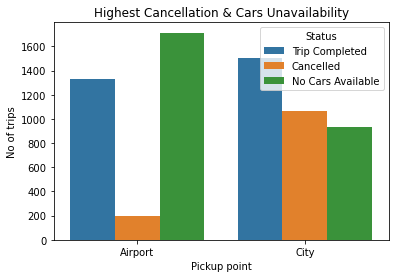

In [43]:
#Highest cancellation occurs in City and Cars Unavailabe in the Airport.
sns.countplot(x = "Pickup point", hue = "Status", data = ubike_data).set(title="Highest Cancellation & Cars Unavailability",ylabel="No of trips")
plt.show()

In [44]:
# Let's create pie charts instead of a count plots
def pie_chart(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

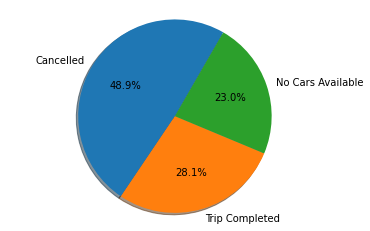

In [45]:
# percentage breakup of status on the basis of pickup location
# Status of trips @ Morning Peak Hours where pickup point is City
df_city = ubike_data.loc[(ubike_data["Pickup point"] == "City") & (ubike_data.Time_of_Day == "Morning_Peakhours")]
df_city_count = pd.DataFrame(df_city.Status.value_counts())
pie_chart(df_city_count)

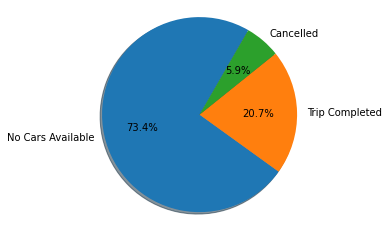

In [46]:
# Status of trips @ Evening peakhours where pickup point is Airport
df_airport = ubike_data.loc[(ubike_data["Pickup point"] == "Airport") & (ubike_data["Time_of_Day"] == "Evening_Peakhours")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)